In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2
dtype = torch.FloatTensor

In [3]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [152]:
class MyLinearRegression:
    def __init__(self):
        # Randomly initialize weights
        self.w1 = Variable(torch.randn((1,1)).type(dtype), requires_grad=True)
    
    def forward(self, x):
        h = x.mm(self.w1)
        return h
    
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.w1]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)
    

def mselossfunc(pred, y):
    # TODO: implement the MSE loss function
    loss = (pred - y).pow(2).sum()
    return loss

model = MyLinearRegression()
numpy_inputs = np.asarray([[0.0], [1.0], [2.0]], dtype = np.float32)
torch_inputs = Variable(torch.from_numpy(numpy_inputs))
torch_outputs = model(torch_inputs)
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))

Testing model: an input of [[ 0.]
 [ 1.]
 [ 2.]] gives a prediction:
 Variable containing:
 0.0000
 0.2119
 0.4239
[torch.FloatTensor of size 3x1]



In [158]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):

    for epoch in range(num_epoch):
        # TODO: Step 1 - create torch variables corresponding to features and labels
        torchFeatures = Variable(torch.from_numpy(features), requires_grad=False)
        torchLabel= Variable(torch.from_numpy(labels), requires_grad=False)

        # TODO: Step 2 - compute model predictions and loss
        prediction = model(torchFeatures);
        loss = lossfunc(prediction, torchLabel);
    
        # TODO: Step 3 - do a backward pass and a gradient update step
        
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable weights
        # of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss.backward()
        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()
        
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epoch, loss.data[0]))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    order = np.argsort(x_train, axis = 0)
    
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/50], Loss: 180.8580
Epoch [11/50], Loss: 2.5381
Epoch [21/50], Loss: 2.5378
Epoch [31/50], Loss: 2.5375
Epoch [41/50], Loss: 2.5372


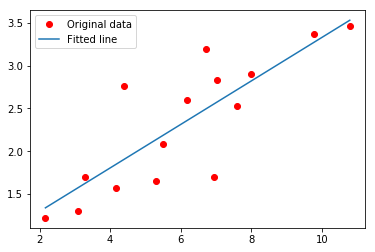

In [159]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = mselossfunc, 
      optimizer = optimizer,
      num_epoch = 50)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 826.6658
Epoch [11/100], Loss: 2.6249
Epoch [21/100], Loss: 2.6181
Epoch [31/100], Loss: 2.6119
Epoch [41/100], Loss: 2.6061
Epoch [51/100], Loss: 2.6007
Epoch [61/100], Loss: 2.5957
Epoch [71/100], Loss: 2.5911
Epoch [81/100], Loss: 2.5869
Epoch [91/100], Loss: 2.5829


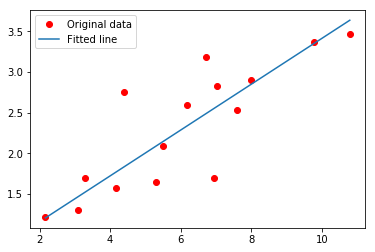

In [242]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # TODO: Define the parameters of the model (linear nn layer)
        self.linear1 = torch.nn.Linear(1,1)
    
    def forward(self, x):
        # TODO: implement forward computation
        return self.linear1(x)
    
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = torch.nn.MSELoss(size_average=False)

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 100)
visualize(x_train, y_train, model)

## MLP

Epoch [1/300], Loss: 122.7541
Epoch [11/300], Loss: 15.0257
Epoch [21/300], Loss: 12.0448
Epoch [31/300], Loss: 10.1876
Epoch [41/300], Loss: 8.2511
Epoch [51/300], Loss: 8.3260
Epoch [61/300], Loss: 7.9809
Epoch [71/300], Loss: 7.8982
Epoch [81/300], Loss: 7.7129
Epoch [91/300], Loss: 7.2878
Epoch [101/300], Loss: 5.8318
Epoch [111/300], Loss: 4.1793
Epoch [121/300], Loss: 3.3621
Epoch [131/300], Loss: 2.9144
Epoch [141/300], Loss: 2.7375
Epoch [151/300], Loss: 2.6840
Epoch [161/300], Loss: 2.6696
Epoch [171/300], Loss: 2.6604
Epoch [181/300], Loss: 2.6555
Epoch [191/300], Loss: 2.6519
Epoch [201/300], Loss: 2.6493
Epoch [211/300], Loss: 2.6472
Epoch [221/300], Loss: 2.6451
Epoch [231/300], Loss: 2.6432
Epoch [241/300], Loss: 2.6413
Epoch [251/300], Loss: 2.6394
Epoch [261/300], Loss: 2.6375
Epoch [271/300], Loss: 2.6357
Epoch [281/300], Loss: 2.6338
Epoch [291/300], Loss: 2.6319


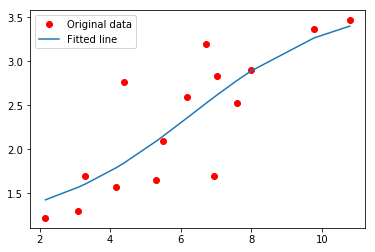

In [298]:
class MLP(nn.Module):
    def __init__(self, H):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        
        self.linear1 = torch.nn.Linear(1, H)
        self.linear2 = torch.nn.Linear(H,H) 
        self.linear3 = torch.nn.Linear(H, 1)
    
    
    def forward(self, x):
        #h_sig = torch.nn.functional.sigmoid(self.linear1(x))
        h_relu = torch.nn.functional.sigmoid(self.linear1(x)) 
        y_pred = self.linear3(h_relu)
        return y_pred
        
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 2
learning_rate = 0.1


model = MLP(H = hidden_size)

lossfunc = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 300)
visualize(x_train, y_train, model)